<blockquote><center><span style="font-size:20px;">Life can only be understood <i>backwards</i>.
<br>But it must be lived <i>forwards</i></span></center></blockquote>
<p style="text-align:right"> - Soren Kierkegaard </p>


***

# A Look into the Habits of (DS & ML)-Experienced Kagglers



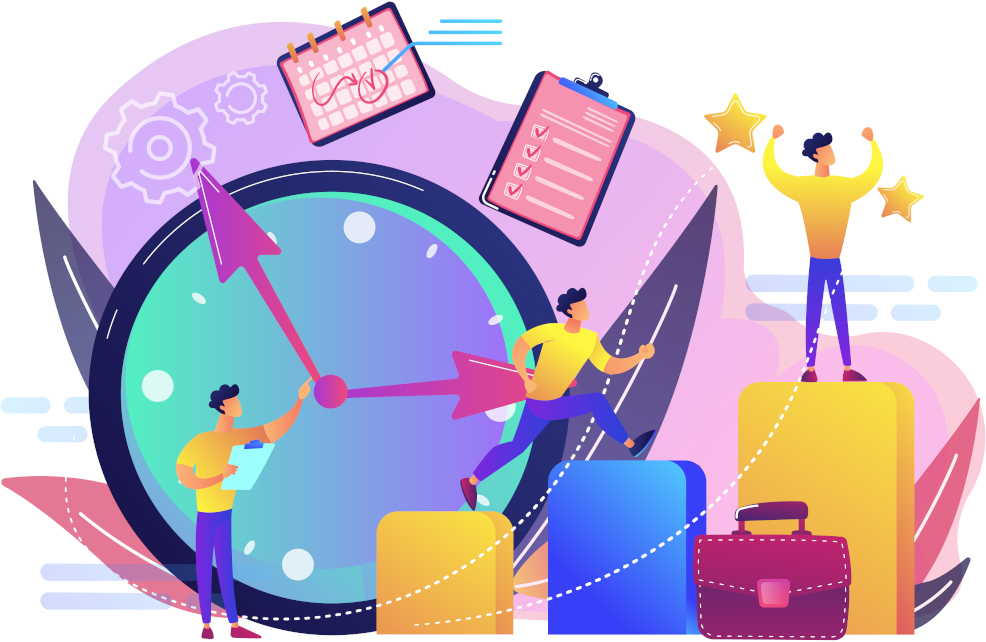
<a href="https://www.freepik.com/vectors/cartoon">Cartoon vector created by vectorjuice - www.freepik.com</a> 

The <b>Kaggle 2020 DS Survey</b> showed maturity in terms of questions and how they explored the preferred tools and practices of the Kagglers.
<br>Many of us come to Kaggle to learn from the masters (and grandmasters) about their techniques. What stays behind the scene is their profile, what resources they have dedicated to the art, and yes! their weapons of choice.

<br>In this notebook <span style="color:teal;">I have rummaged through the answers of the Kagglers who have been practising Data Science and Machine Learning for a long time</span>. Hoping that I can learn some of the habits that they have cultivated over the years of practice.

***

In [ ]:
# Let's gooooooo

import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import os
survey20 = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory = False)
# ignore first row since it contains description of questions
survey20 = survey20.drop([0])

print ("Shape of Kaggle DS Survey Data: ", survey20.shape)

## Getting to know the (DS & ML)-experienced Kagglers

In [ ]:
# Q15 = For how many years have you used machine learning methods?
print("ML Experience of Kagglers in the year 2020: ", survey20.groupby('Q15').size())

On querying the years spent on machine learning practice by Kagglers, we get <span style="color:teal;">nine</span> categories.
<br>So who do we focus on?
<br>There are <i>Silver</i> Kagglers who have used ML methods for 5-10 years 😎. Then there are <i>Gold</i> Kagglers who have practised ML methods for 10-20 years 🤩. And then we have the <i>Platinum</i> group of Kagglers who have used ML for 20+ years 🤯

<br>Alrighty! Let us meet and greet the Silver, Golden and Platinum Kagglers.

In [ ]:
# Removing participants who have 0 ML experience; We're talking about ML experience right...
survey20 = survey20[survey20.Q15 != 'I do not use machine learning methods']
print ("Number of survey participants who have ML experience: ", survey20.shape[0])

In [ ]:
# Put colors to numbers

# Pretty names for the graph & easy access
expdict = {"Under 1 year": "< 1 Year",
           "1-2 years": "< 2 Years",
           "2-3 years": "2-5 Years",
           "3-4 years": "2-5 Years",
           "4-5 years": "2-5 Years",
           "5-10 years": "5-10 Years",
           "10-20 years": "10-20 Years",
           "20 or more years": "20+ Years"}

# What we would plot
nm_cols = ['Experience', 'Count']
expname_count_df = pd.DataFrame(columns = nm_cols)

# We use funcs; We is cool;
def populate_expname_count(in_df, out_df):
    enames = in_df.ExpName.unique()
    for enm in enames:
        out_df = out_df.append({'Experience': enm,
                                'Count': len(in_df[in_df['ExpName'] == enm])}, ignore_index = True)
    return out_df


def set_value(row_number, assigned_value):
    return assigned_value[row_number] 

# focussed columns
inp_count_df = survey20[['Q15']]
inp_count_df = inp_count_df.dropna()
inp_count_df['ExpName'] = inp_count_df['Q15'].apply(set_value, args = (expdict, )) 
expname_count_df = populate_expname_count(inp_count_df, expname_count_df)

expname_count_df['color'] = 'rgb(179,179,179)'
expname_count_df.loc[expname_count_df['Experience'] == '5-10 Years', "color"] = '#FFFFCC'
expname_count_df.loc[(expname_count_df['Experience'] == '10-20 Years'), "color"] = '#9EB9F3'
expname_count_df.loc[(expname_count_df['Experience'] == '20+ Years'), "color"] = '#8DD3C7'

# Gimme the pretty picture now!
fig = px.bar(expname_count_df,
             x = "Experience",
             y = "Count",
             color = "color",
             hover_name = "Count",
             color_discrete_sequence = expname_count_df.color.unique())
fig.update_layout(showlegend = False)
fig.show()



Newbies i.e. Kagglers who have started to use ML in past one year vastly outnumber all others
<br>Needless to say, you're using the Rona time wisely!

<br>The other demographic of prominence is the Kagglers who are advanced beginners, in other words, those who have been using ML techniques for just under two years.
<br>

Now where are the experts?
<br><span style="color:teal;">The silvers(5-10 years) are definitely more than the golds(10-20 years) and platinums(20+ years); And quite visible in their presence.</span>


In [ ]:
# Smaller label for 20+ years experience
survey20["temp"] = survey20["Q15"].apply(str)
survey20.loc[survey20["Q15"] == '20 or more years', "temp"] = '20+ years'
survey20['Q15'] = survey20['temp']
del survey20['temp']


***

In this survey data, could there be any 'child prodigies' who started ML programming at the age of (-2) or 8 to 10 years?
<br>Checking for inconsistencies where participants reported an ML experience of 20+ or 10-20 years while specifying their age in 18-21 range.


In [ ]:
# Checking Inconsistencies

# You can't have an 18-21 year old who has ML experience of 20+ years. Right?
print("Number of 18-21 year olds who have ML experience of 20+ years: ", len(survey20[(survey20['Q1'] == '18-21') & (survey20['Q15'] == '20+ years')]))
# Remove these 'child prodigies'
survey20.drop(survey20[(survey20['Q1'] == '18-21') & (survey20['Q15'] == '20+ years')].index, inplace = True) 

# Do we have any Kagglers who started ML programming at the age of 8-10 years
print("Number of 18-21 year olds who have ML experience of 10-20 years: ", len(survey20[(survey20['Q1'] == '18-21') & (survey20['Q15'] == '10-20 years')]))
# Gotta drop ya kid
survey20.drop(survey20[(survey20['Q1'] == '18-21') & (survey20['Q15'] == '10-20 years')].index, inplace = True) 


***

### Ages, Gender, Formal education & Job titles of (DS & ML)-Experienced Kagglers
Let us break down the distribution of what ages, gender, degree and jobs that define the profile of our DS-ML experts

<b>So how old are our ML experts?</b>

In [ ]:
# Bursting suns of comparisons ^_^
# How are age, gender, formal education & job title distributed

subset_df = survey20[["Q1", "Q2", "Q4", "Q5", "Q15"]]

subset_df = subset_df[(subset_df.Q15 == '5-10 years') | (subset_df.Q15 == '10-20 years') | (subset_df.Q15 == '20+ years')]

# How are ages distributed
fig_age_exp = px.treemap(subset_df,
                        path=['Q15', 'Q1'],
                        color='Q1',
                        color_discrete_sequence = px.colors.sequential.YlGnBu)
fig_age_exp.show()


<br><span style="color:Teal;">Majority of Kagglers with 20+ years of ML experience started its use in their early thirties or late twenties</span>.
So it is safe to say that they first got their hands on ML while they were already employed.
<br>What about the Kagglers who have been using ML techniques for a decade or so?
Again a majority of them started out in late twenties to late thirties.

<br>Now we can see that the silver ML programmers (experience = 5-10 years) are present in bigger numbers than the other two categories.
Again we can say that about 50% of them started using ML in their early twenties and the thirties.
<br>But <span style="color:Teal;">the popularity of ML techniques has risen in past 5 years among Kagglers of all ages</span>, including late teenagers and programmers past their 50s.

<br>A shout-out to the Kagglers who picked ML practice while their counterparts were enjoying retirement 🙇

<b>The Gender Bender</b>

In [ ]:
# How are gender distributed
fig_gndr_exp = px.treemap(subset_df,
                        path=['Q15', 'Q2'],
                        color='Q2',
                        color_discrete_sequence = px.colors.sequential.YlGnBu)
fig_gndr_exp.show()

<br><span style="color:Teal;">Men rule in numbers in the experienced categories</span>.
<br>Here's to hoping that a decade later, more balanced graphs would be observed.

<b>What Degrees do the ML Experts hold?</b>

In [ ]:
# How is formal education distributed
fig_deg_exp = px.treemap(subset_df,
                        path=['Q15', 'Q4'],
                        color='Q4',
                        color_discrete_sequence = px.colors.sequential.YlGnBu)
fig_deg_exp.show()

While majority of Kagglers who have been practising ML techniques for 5-10 years hold a Master's degree.
<br><span style="color:Teal;">Doctoral degree is very popular amongst the experienced ML programmers</span>.
<br>The abundance of doctorates is more noticeable as we move towards higher ML expertise.

<br>It should also be noted that many Kagglers have gained expertise in ML while formally they hold other professional degrees.
<br><i>There's no stopping a passion</i>. Right?

<b>What Jobs do the ML Experts do?</b>

In [ ]:
# How are job titles distributed
fig_job_exp = px.treemap(subset_df,
                         path=['Q15', 'Q5'],
                         color='Q5',
                         color_discrete_sequence = px.colors.sequential.YlGnBu)
fig_job_exp.show()

<span style="color:Teal;">Majority of ML experts among Kagglers are Scientists.</span> And they are very much a part of research field as well.
<br>While other ML experts have been designated titles specific to their workplace, many identify themselves as Engineers, Programmers and Statisticians.
This shows how Data science is making headways in diverse fields.

<br>A number of Kagglers who have been using ML techniques for 5-10 years also include students.

### Where do the (DS & ML)-Experienced Kagglers Live?


In [ ]:
# Where do our experts live? (Mama raised no stalkers)

cntry_df = survey20[['Q3', 'Q15']]

# We just want country names; not non-specific text
cntry_df = cntry_df[cntry_df.Q3 != 'Other'] 

# 15 Countries with highest 5-10 years ML Experts
five_df = (cntry_df.assign(Helper = (cntry_df['Q15'] == '5-10 years'))
        .groupby(['Q3'])['Helper']
        .agg([('FiveCount','sum'),('Count','size')])
        .astype(int)
        .reset_index()).sort_values('FiveCount', ascending = False).head(15)
print ("Countries with Highest # of 5-10 years ML Experts (in descending order):\n", list(five_df['Q3']))

# 15 Countries with highest 10-20 years ML Experts
ten_df = (cntry_df.assign(Helper = (cntry_df['Q15'] == '10-20 years'))
        .groupby(['Q3'])['Helper']
        .agg([('TenCount','sum'),('Count','size')])
        .astype(int)
        .reset_index()).sort_values('TenCount', ascending = False).head(15)
print ("\nCountries with Highest # of 10-20 years ML Experts (in descending order):\n", list(ten_df['Q3']))

# 15 Countries with highest 20+ years ML Experts
twenty_df = (cntry_df.assign(Helper = (cntry_df['Q15'] == '20+ years'))
        .groupby(['Q3'])['Helper']
        .agg([('TwentyCount','sum'),('Count','size')])
        .astype(int)
        .reset_index()).sort_values('TwentyCount', ascending = False).head(15)
print ("\nCountries with Highest # of 20+ years ML Experts (in descending order):\n", list(twenty_df['Q3']))

# To plot numbers in relevant scale, selecting countries that are common among the above 3 lists
common_countries = list(set(five_df.Q3) & set(ten_df.Q3) & set(twenty_df.Q3))
print ("\nCommon countries with Highest # of ML Experts (in descending order):\n", common_countries)

# Let's create a DF that has counts of all three expert experiences
common_df = five_df[five_df['Q3'].isin(common_countries)]

from functools import reduce
# join bw 5-10 & 10-20
common_df = reduce(lambda x,y: pd.merge(x,y, on = 'Q3', how='outer'), [common_df, ten_df[ten_df['Q3'].isin(common_countries)]])
common_df = common_df.rename(columns = {'Count_x': 'Count'})
del common_df['Count_y']

# join bw above & 10-20
common_df = reduce(lambda x,y: pd.merge(x,y, on = 'Q3', how='outer'), [common_df, twenty_df[twenty_df['Q3'].isin(common_countries)]])
del common_df['Count_x']
del common_df['Count_y']

# Making separate columns into rows for better plotting capability
common_df = common_df.melt(id_vars = ["Q3"], var_name = "Experience", value_name = "Count")
# Renaming melted columns to experience text again
common_df.loc[(common_df.Experience == 'FiveCount'), 'Experience'] = '5-10 years'
common_df.loc[(common_df.Experience == 'TenCount'), 'Experience'] = '10-20 years'
common_df.loc[(common_df.Experience == 'TwentyCount'), 'Experience'] = '20+ years'
common_df = common_df.rename(columns = {'Q3': 'Country of Residence'})

# And we plot!
fig = px.bar(common_df,
             x = "Country of Residence",
             y = "Count",
             color = "Experience",
             #title = "Experts and Their Countries",
             color_discrete_sequence = px.colors.sequential.YlGnBu)
fig.show()

<span style="color:Teal;">Across the three categories of DS-ML expertise, the US, many European nations and Russia host the majority of them.</span>
<br>Though it should be noted that Asian countries like India and Japan surpassed the UK for the categories of Kagglers who have been practising ML for 5-20 years. Surely, these two nations have emerged as data science hubs and would soon contribute a higher number of experts to the Kaggle community.
<br>The other two countries that hosted a large number of 5-20 years of ML expertise include Canada and Australia. This observation could also be attributed to the fact that these countries have been migratory destination of techies in the past few years.

***

## Let's Talk About Work

Long time back they got a taste of DS-ML. They got hooked. And now they are the elders of the Kaggle clan.

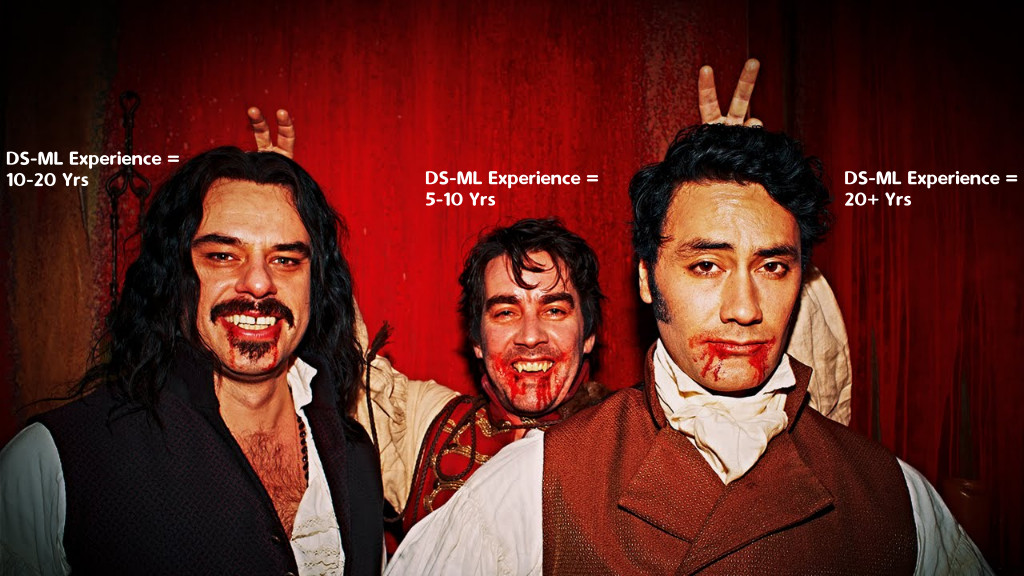

<br>So just what do they do in the shadows?
<br>While the scientist profile is common among the three experience categories, what functions comprise their work profile?
<br>Let's explore the work Kaggle elders do.

In [ ]:
# The Question "Select any activities that make up an important part of your role at work" was multi-choice
# So a person could've chosen any number of parts of Q23
jobprof_df = survey20[['Q15', 'Q5', 'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER']]
                      
jobprof_df = jobprof_df[(jobprof_df.Q15 == '5-10 years') | (jobprof_df.Q15 == '10-20 years') | (jobprof_df.Q15 == '20+ years')]

profile_dict = {'Q23_Part_1': 'Analyze Data to Influence Decisions',
                'Q23_Part_2': 'Build(+,/Run) Data Infra',
                'Q23_Part_3': 'Build Prototypes',
                'Q23_Part_4': 'Build(+,/Run) ML Service',
                'Q23_Part_5': 'Improve existing ML models',
                'Q23_Part_6': 'Research',
                'Q23_Part_7': 'None of listed',
                'Q23_OTHER': 'Other'}

prof_plotdf = jobprof_df

# This func creates a new col with name = the job function description & col value = the presence flag(=True/False)
# Now why did I make the col name as job function? 
# Because then the DF could be melted to make cols to rows
def set_profile_flags(in_df, col_name):
    in_df[profile_dict[col_name]] = ~in_df[col_name].isnull()
    # delete the original question col since it is redundant now
    del in_df[col_name]
    return in_df

prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_1')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_2')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_3')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_4')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_5')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_6')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_Part_7')
prof_plotdf = set_profile_flags(prof_plotdf, 'Q23_OTHER')

# And, we melt the df
prof_plotdf = prof_plotdf.melt(id_vars = ["Q15", "Q5"], var_name = "Function", value_name = "Presence")
# Dropping all false presence
prof_plotdf = prof_plotdf[prof_plotdf.Presence == True]
# Now we don't need the presence col
del prof_plotdf['Presence']

# Count functions for a job title and experience category
prof_plotdf = prof_plotdf.groupby(['Q15','Q5', 'Function']).size().reset_index(name='counts')
prof_plotdf = prof_plotdf.rename(columns = {'Q5': 'Job Title'})

# Puh-lot!
fig = px.bar(prof_plotdf,
             x = "Function",
             y = "counts",
             animation_frame = "Q15", # Enjoy the animation :)
             color = "Job Title",
             color_discrete_sequence = px.colors.sequential.YlGnBu,
             title="How Role-wise Functions vary for the Three Expertise Categories",
             range_y=[0, 550],
             hover_name = "counts")

fig.show()

The DS-ML experts of Kaggle community are mostly busy with building prototypes to explore possible application of ML to different areas, or improving on the existing models. So yes, <span style="color:teal;">research is one of their biggest contribution to the field</span>
<br>Another area where their experience is greatly being appreciated is application of their knowledge to business decisions.
<br>While at the lower side of the expertise spectrum of less than a decade of ML experience, an expert would majorly be working as an analyst or an engineer, and substantially involved with data infrastructure conception and implementation as well.
<br><br>The job function <i>Other</i> is also an interesting observation, since it could mean the work these experts put in enriching the Kaggle community. Or mentoring younger colleagues.

***

## Who's The Boss?

How does the employer profile change for different experience categories?
<br>Or does it not change at all?


### Employer sizes: Experts vs Rest

In [ ]:
emp_df = survey20[['Q5', 'Q15', 'Q20', 'Q21', 'Q22', 'Q24', 'Q25']]

# Do our experts work?
# Yes, Who's paying our experts? What are they like?
# No, oh k. Bye!
emp_df = emp_df[(emp_df.Q5 != 'Student') & (emp_df.Q5 != 'Currently not employed')]

emp_df = emp_df[~emp_df.Q20.isnull()]
emp_df = emp_df[~emp_df.Q21.isnull()]
emp_df = emp_df[~emp_df.Q22.isnull()]
emp_df = emp_df[emp_df.Q22 != 'I do not know']

empexp_df = emp_df[(emp_df.Q15 == '5-10 years') | (emp_df.Q15 == '10-20 years') | (emp_df.Q15 == '20+ years')]
empex_count = empexp_df.groupby(['Q20']).Q20.agg('count').to_frame('Count').reset_index()

emprest_df = emp_df[(emp_df.Q15 != '5-10 years') | (emp_df.Q15 != '10-20 years') | (emp_df.Q15 != '20+ years')]
emprest_count = emprest_df.groupby(['Q20']).Q20.agg('count').to_frame('Count').reset_index()

specs = [[{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 2, specs = specs, subplot_titles=['(DS & ML)-Experts', 'Rest'])
fig.add_trace(go.Pie(labels = empex_count.Q20,
                     scalegroup='two',
                     values = empex_count.Count,
                     name="Experts",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = emprest_count.Q20,
                     scalegroup='one',
                     values = emprest_count.Count,
                     name="Rest",
                     marker_colors = px.colors.sequential.Greys),
              1, 2)

fig.update_traces(hole=.4)
fig.show()

<span style="color:teal;">It's go big or go home for the DS-ML expert Kagglers</span>
<br>A quarter of experts are working at small-sized firms that are most probably start-ups. Moreover, these could include firms owned by the expert themselves. Definitely a high-risk, high-reward situation with a lot of visibility.

![](https://media.giphy.com/media/OPuj7A2SEWnAkBZlQd/giphy.gif)


<br>The other two quarters of them are working in large-sized firms. While the remaining quarter is divided over medium-sized firms.


<br>

Now what about the acceptance of ML by the employer?

#### Employer ML practice: Experts vs Rest

In [ ]:
ml_incorporation_txt = {
    'We are exploring ML methods (and may one day put a model into production)': 'Someday, Maybe',
    'We use ML methods for generating insights (but do not put working models into production)': 'Internally only',
    'We recently started using ML methods (i.e., models in production for less than 2 years)': 'Recent Players',
    'We have well established ML methods (i.e., models in production for more than 2 years)': 'Old Players',
    'No (we do not use ML methods)': 'No'
}

emp_df.loc[(emp_df.Q22 == 'We are exploring ML methods (and may one day put a model into production)'), 'Q22'] = ml_incorporation_txt["We are exploring ML methods (and may one day put a model into production)"]
emp_df.loc[(emp_df.Q22 == 'We use ML methods for generating insights (but do not put working models into production)'), 'Q22'] = ml_incorporation_txt["We use ML methods for generating insights (but do not put working models into production)"]
emp_df.loc[(emp_df.Q22 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'), 'Q22'] = ml_incorporation_txt["We recently started using ML methods (i.e., models in production for less than 2 years)"]
emp_df.loc[(emp_df.Q22 == 'We have well established ML methods (i.e., models in production for more than 2 years)'), 'Q22'] = ml_incorporation_txt["We have well established ML methods (i.e., models in production for more than 2 years)"]
emp_df.loc[(emp_df.Q22 == 'No (we do not use ML methods)'), 'Q22'] = ml_incorporation_txt["No (we do not use ML methods)"]

empexp_df = emp_df[(emp_df.Q15 == '5-10 years') | (emp_df.Q15 == '10-20 years') | (emp_df.Q15 == '20+ years')]
emprest_df = emp_df[(emp_df.Q15 != '5-10 years') | (emp_df.Q15 != '10-20 years') | (emp_df.Q15 != '20+ years')]

emp_mlex_count = empexp_df.groupby(['Q22']).Q22.agg('count').to_frame('Count').reset_index()
emp_mlrest_count = emprest_df.groupby(['Q22']).Q22.agg('count').to_frame('Count').reset_index()

specs = [[{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 2, specs = specs, subplot_titles=['(DS & ML)-Experts', 'Rest'])
fig.add_trace(go.Pie(labels = emp_mlex_count.Q22,
                     scalegroup='two',
                     values = emp_mlex_count.Count,
                     name="Experts",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = emp_mlrest_count.Q22,
                     scalegroup='one',
                     values = emp_mlrest_count.Count,
                     name="Rest",
                     marker_colors = px.colors.sequential.Greys),
              1, 2)

fig.update_traces(hole=.4)
fig.show()

<span style="color:teal;">So if you are an experienced DS & ML programmer, there's almost half a chance that you're employed at a firm that has incorporated ML models into production.</span>
<br>Or you might be the one who is bringing in the ML game to their firm.
<br>Almost a similar number of you work on ML methods that are used to gain insights and probably used for decision making.
<br>And again a similar number of you work on ML applications alongside a mainstream job that does not involve ML use as such. <i>Smells of DS-ML passion again.</i>

<br>If we see the Kagglers who have an ML experience of under 5 years, they are somewhat uniformly distributed over the five degrees of ML incorporation.

#### Money Talk <i>Ka-ching!</i>

Who's bringing in the big bucks? Is it a function of expertise?

In [ ]:
# Who makes small moolah, medium moolah & big moolah

# clubbing together some pay ranges for a neater graph
pay_ranges = {
    '$0-999': '<= 10K',
    '1,000-1,999': '<= 10K',
    '2,000-2,999': '<= 10K',
    '3,000-3,999': '<= 10K',
    '4,000-4,999': '<= 10K',
    '5,000-7,499': '<= 10K',
    '7,500-9,999': '<= 10K',
    '10,000-14,999': '10-25K',
    '15,000-19,999': '10-25K',
    '20,000-24,999': '10-25K',
    '25,000-29,999': '25K-50K',
    '30,000-39,999': '25K-50K',
    '40,000-49,999': '25K-50K',
    '50,000-59,999': '50-100K',
    '60,000-69,999': '50-100K',
    '70,000-79,999': '50-100K',
    '80,000-89,999': '50-100K',
    '90,000-99,999': '50-100K',
    '100,000-124,999': '100-150K',
    '125,000-149,999': '100-150K',
    '150,000-199,999': '150-250K',
    '200,000-249,999': '150-250K',
    '250,000-299,999': '250-500K',
    '300,000-500,000': '250-500K',
    '> $500,000': '> $500,000'
}
empexp_df = empexp_df.dropna()
empexp_df['Q24'] = empexp_df['Q24'].apply(set_value, args = (pay_ranges, )) 


comp_count = empexp_df.groupby(['Q24', 'Q15']).Q24.agg('count').to_frame('Count').reset_index()
comp_count = empexp_df.groupby(['Q24', 'Q15']).Q24.agg('count').to_frame('Count').reset_index()
comp_count = empexp_df.groupby(['Q24', 'Q15']).Q24.agg('count').to_frame('Count').reset_index()


# Puh-lot!
fig = px.bar(comp_count,
             x = "Q24",
             y = "Count",
             animation_frame = "Q15",
             color = "Q24",
             color_discrete_sequence = px.colors.sequential.YlGnBu,
             labels={"Q24": "Compensation($)"},
             range_y=[0, 200],
             hover_name = "Count")

fig.show()

Do pies make things better? Hell yeah!
<br>Let's look at the above figures in the form of chonky percentages.

In [ ]:
# Frankly I just wanted the apple one  ¯\_(ツ)_/¯ 

comp_5_count = empexp_df[empexp_df.Q15 == '5-10 years'].groupby(['Q24']).Q24.agg('count').to_frame('Count').reset_index()
comp_10_count = empexp_df[empexp_df.Q15 == '10-20 years'].groupby(['Q24']).Q24.agg('count').to_frame('Count').reset_index()
comp_20_count = empexp_df[empexp_df.Q15 == '20+ years'].groupby(['Q24']).Q24.agg('count').to_frame('Count').reset_index()

specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 3, specs = specs, subplot_titles=['5-10 Years', '10-20 Years', '20+ Years'])
fig.add_trace(go.Pie(labels = comp_5_count.Q24,
                     scalegroup='one',
                     values = comp_5_count.Count,
                     name="5-10 years",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = comp_10_count.Q24,
                     scalegroup='one',
                     values = comp_10_count.Count,
                     name="10-20 years",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 2)
fig.add_trace(go.Pie(labels = comp_20_count.Q24,
                     scalegroup='one',
                     values = comp_20_count.Count,
                     name="20+ years",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 3)

fig.update_traces(hole=.4)
fig.show()

As an experienced data scientist, you can expect to earn in the range of 50k-250k depending on which country you live in.
<br>With growing expertise, your pay would definitely improve as we see a larger percentage of expert Kagglers earning more than $500,000.

In [ ]:
# Simpler compensation ranges
empexp_df['Q25'] = empexp_df['Q25'].str.replace(r"\(.*\)","")
expense_dict = {'$0 ': '$0',
                '$1-$99': '< $100',
                '100−999': '$100 - $999',
                '$100-$999': '$100 - $999',
                '$1000-$9,999': '$1,000 - $9,999',
                '10,000−99,999': '$10,000 - $99,999',
                '$10,000-$99,999': '$10,000 - $99,999',
                '$100,000 or more ': '> $100,000'
}
empexp_df['Q25'] = empexp_df['Q25'].apply(set_value, args = (expense_dict, )) 

### Relativity of Money Matters
Can we say that companies who have a high number of employees are the ones paying big bucks to our expert Kagglers?
<br>Or is ML incorporation only for the big boys club?
<br>More so, is money spent on ML+cloud services only something that big firms can afford?
<br>Computing correlations to find the answers to above questions.

In [ ]:
# Is there any correlation between Employer size, usage of ML, compensation paid to Kaggler experts & money spent by the employer on ML+cloud services
# What kinds of firms spend more on ML? Pay more?

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

corr_df = empexp_df[['Q20', 'Q22', 'Q24', 'Q25']]

corr_df['Q20']= label_encoder.fit_transform(corr_df['Q20']) 
corr_df = corr_df.rename(columns = {'Q20': 'Employer Size'})
corr_df['Q22']= label_encoder.fit_transform(corr_df['Q22']) 
corr_df = corr_df.rename(columns = {'Q22': 'ML Incorporation Extent'})
corr_df['Q24']= label_encoder.fit_transform(corr_df['Q24']) 
corr_df = corr_df.rename(columns = {'Q24': 'Kaggler Compensation'})
corr_df['Q25']= label_encoder.fit_transform(corr_df['Q25']) 
corr_df = corr_df.rename(columns = {'Q25': 'Expenses on ML'})

fig = px.imshow(corr_df.corr(method ='pearson'), color_continuous_scale="YlGnBu")
fig.show()


<span style="color:teal;">Expenses on ML+cloud sevices and compensation of ML experts is NOT a function of company size.</span>
<br>This just re-enforces the belief that start-ups primarily focussed on ML/AI-based products have a major presence. They don't mind paying our experts, or shelling out money to buy tech to support them.
<br><br>Let's summarize the employer profile of (DS &ML)-Experts on Kaggle.

In [ ]:
# so who's spending big on ML+Cloud?
sank_df = empexp_df[['Q15', 'Q20', 'Q22', 'Q25']]

# https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0
def genSankey(df, cat_cols = [], value_cols = '', title = 'Sankey Diagram'):
    colorPalette = ['#FFFFCC','#8DD3C7','#B3DE69','#9EB9F3','#87C55F']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
            sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
        
    return labelList, colorList, sourceTargetDf

sank_df = sank_df[(sank_df.Q22 == 'Old Players') | (sank_df.Q22 == 'Recent Players') | (sank_df.Q22 == 'Internally only')]

emp_sankey = sank_df.groupby(['Q15', 'Q20', 'Q22', 'Q25']).Q15.agg('count').to_frame('count').reset_index()
elabels, ecolors, sankey_graph = genSankey(emp_sankey,
                                           cat_cols=['Q15', 'Q20', 'Q22', 'Q25'],
                                           value_cols='count',
                                           title='Summary of Employer profile')

fig = go.Figure(data=[go.Sankey(
    node = dict(pad = 15,
                thickness = 20,
                line = dict(color = "black", width = 0.5),
                label = elabels,
                color = ecolors),
    link = dict(source = sankey_graph['sourceID'],
                target = sankey_graph['targetID'],
                value = sankey_graph['count']))])
fig.update_layout(title_text="Employer Profile of (DS & ML)-Expert Kagglers", font_size=10)
fig.show()


<span style="color:teal;">Expert Kagglers obviously favor firms who have been old players of ML incorporation and not shy on spending money to support their work.</span>
<br>They could also be their own bosses or bringing in the ML game to their firms.
<br>Lastly, Open-source/In-house technology has a distinguished presence since a large number of experts claimed that not much of big bucks were spent on ML+clouds services by their employers.

***

## Weapons of Choice

Does the preference of programming language, editor and development environment differ for the experts?
<br>Or are they on the same boat?


In [ ]:
# Proging Preferences of Prolific Kagglers ^-^

lang_df = survey20[['Q15', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']]

language_dict = {'Q7_Part_1': 'Python',
                 'Q7_Part_2': 'R',
                 'Q7_Part_3': 'SQL',
                 'Q7_Part_4': 'C',
                 'Q7_Part_5': 'C++',
                 'Q7_Part_6': 'Java',
                 'Q7_Part_7': 'Javascript',
                 'Q7_Part_8': 'Julia',
                 'Q7_Part_9': 'Swift',
                 'Q7_Part_10': 'Bash',
                 'Q7_Part_11': 'MATLAB',
                 'Q7_Part_12': 'None',
                 'Q7_OTHER': 'Other'}

def set_profile_flags(in_df, col_name):
    in_df[language_dict[col_name]] = ~in_df[col_name].isnull()
    # delete the original question col since it is redundant now
    del in_df[col_name]
    return in_df

lang_df = set_profile_flags(lang_df, 'Q7_Part_1')
lang_df = set_profile_flags(lang_df, 'Q7_Part_2')
lang_df = set_profile_flags(lang_df, 'Q7_Part_3')
lang_df = set_profile_flags(lang_df, 'Q7_Part_4')
lang_df = set_profile_flags(lang_df, 'Q7_Part_5')
lang_df = set_profile_flags(lang_df, 'Q7_Part_6')
lang_df = set_profile_flags(lang_df, 'Q7_Part_7')
lang_df = set_profile_flags(lang_df, 'Q7_Part_8')
lang_df = set_profile_flags(lang_df, 'Q7_Part_9')
lang_df = set_profile_flags(lang_df, 'Q7_Part_10')
lang_df = set_profile_flags(lang_df, 'Q7_Part_11')
lang_df = set_profile_flags(lang_df, 'Q7_Part_12')
lang_df = set_profile_flags(lang_df, 'Q7_OTHER')

lang_df = lang_df.melt(id_vars = ["Q15"], var_name = "Language", value_name = "Presence")
# Dropping all false presence
lang_df = lang_df[lang_df.Presence == True]
# Now we don't need the presence col
del lang_df['Presence']


exp_progdf = lang_df[(lang_df.Q15 == '5-10 years') | (lang_df.Q15 == '10-20 years') | (lang_df.Q15 == '20+ years')]
progex_count = exp_progdf.groupby(['Language']).Language.agg('count').to_frame('Count').reset_index()

rest_progdf = lang_df[(lang_df.Q15 != '5-10 years') | (lang_df.Q15 != '10-20 years') | (lang_df.Q15 != '20+ years')]
progrest_count = rest_progdf.groupby(['Language']).Language.agg('count').to_frame('Count').reset_index()

specs = [[{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 2, specs = specs, subplot_titles=['(DS & ML)-Experts', 'Rest'])
fig.add_trace(go.Pie(labels = progex_count.Language,
                     scalegroup='two',
                     values = progex_count.Count,
                     name="Experts",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = progrest_count.Language,
                     scalegroup='one',
                     values = progrest_count.Count,
                     name="Rest",
                     marker_colors = px.colors.sequential.Greys),
              1, 2)

fig.update_traces(hole=.4)
fig.show()

<span style="color:teal;">Python is the blue-eyed boy when it comes to practical DS and ML</span>
<br>While choice of programming languages is pretty much on par for the experts and the rest, Bash scripting is more in use by the experienced Kagglers.
<br>This could be attributed to deployment and test setups that our experts do on a regular basis, as compared to the lesser experienced Kagglers.

<br>While most of the Kagglers are using Python in combination with other languages, <b>what languages do the experts suggest?</b> In other words, what language do the experts feel hold promise for a fruitful career in DS & ML field?

In [ ]:
sugg_df = survey20[['Q15', 'Q8']]

sugg_df = sugg_df[(sugg_df.Q15 == '5-10 years') | (sugg_df.Q15 == '10-20 years') | (sugg_df.Q15 == '20+ years')]

sugg_5_count = sugg_df[sugg_df.Q15 == '5-10 years'].groupby(['Q8']).Q8.agg('count').to_frame('Count').reset_index()
sugg_10_count = sugg_df[sugg_df.Q15 == '10-20 years'].groupby(['Q8']).Q8.agg('count').to_frame('Count').reset_index()
sugg_20_count = sugg_df[sugg_df.Q15 == '20+ years'].groupby(['Q8']).Q8.agg('count').to_frame('Count').reset_index()

#subplot_colors = ['rgb(170,13,254)', 'rgb(133,102,13)', 'rgb(86,86,86)', 'rgb(22,255,50)', 'rgb(251,228,38)', 'rgb(196,69,28)', 'rgb(222,160,253)', 'rgb(50,90,155)', 'rgb(254,175,22)', 'rgb(28,255,206)', 'rgb(144,173,28)', 'rgb(218,96,202)', 'rgb(108,69,22)']

specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 3, specs = specs, subplot_titles=['5-10 Years', '10-20 Years', '20+ Years'])
fig.add_trace(go.Pie(labels = sugg_5_count.Q8,
                     scalegroup='one',
                     values = sugg_5_count.Count,
                     name="5-10 Years",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = sugg_10_count.Q8,
                     scalegroup='two',
                     values = sugg_10_count.Count,
                     name="10-20 Years",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 2)
fig.add_trace(go.Pie(labels = sugg_20_count.Q8,
                     scalegroup='two',
                     values = sugg_20_count.Count,
                     name="20+ Years",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 3)

fig.update_traces(hole=.4)
#fig.update_layout(showlegend=False)
fig.show()

<span style="color:teal;">Python and R languages are here to stay.</span>
<br>While the silver and gold Kagglers feel that SQL, MATLAB and a mix of other languages hold promise, surprisingly they do not show much of interest towards Julia.
<br>On the other hand, the platinum Kagglers feel that DS & ML programming can be furthered by learning C, C++ and Julia.

<br>Now what are the development environments preferred by the experts as compared to lesser experienced Kagglers? 
<br>Let's see.

In [ ]:
ide_df = survey20[['Q15', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
                    'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11', 'Q9_OTHER']]

ide_dict = {'Q9_Part_1': 'Jupyter(Lab/Noteboook)',
            'Q9_Part_2': 'RStudio',
            'Q9_Part_3': 'Visual Studio',
            'Q9_Part_4': 'VSCode',
            'Q9_Part_5': 'PyCharm',
            'Q9_Part_6': 'Spyder',
            'Q9_Part_7': 'Notepad++',
            'Q9_Part_8': 'Sublime Text',
            'Q9_Part_9': 'Vim/Emacs',
            'Q9_Part_10': 'MATLAB',
            'Q9_Part_11': 'None',
            'Q9_OTHER': 'Other'}

def set_ide_flags(in_df, col_name):
    in_df[ide_dict[col_name]] = ~in_df[col_name].isnull()
    # delete the original question col since it is redundant now
    del in_df[col_name]
    return in_df

ide_df = set_ide_flags(ide_df, 'Q9_Part_1')
ide_df = set_ide_flags(ide_df, 'Q9_Part_2')
ide_df = set_ide_flags(ide_df, 'Q9_Part_3')
ide_df = set_ide_flags(ide_df, 'Q9_Part_4')
ide_df = set_ide_flags(ide_df, 'Q9_Part_5')
ide_df = set_ide_flags(ide_df, 'Q9_Part_6')
ide_df = set_ide_flags(ide_df, 'Q9_Part_7')
ide_df = set_ide_flags(ide_df, 'Q9_Part_8')
ide_df = set_ide_flags(ide_df, 'Q9_Part_9')
ide_df = set_ide_flags(ide_df, 'Q9_Part_10')
ide_df = set_ide_flags(ide_df, 'Q9_Part_11')
ide_df = set_ide_flags(ide_df, 'Q9_OTHER')

ide_df = ide_df.melt(id_vars = ["Q15"], var_name = "IDE", value_name = "Presence")
# Dropping all false presence
ide_df = ide_df[ide_df.Presence == True]
# Now we don't need the presence col
del ide_df['Presence']


exp_progdf = ide_df[(ide_df.Q15 == '5-10 years') | (ide_df.Q15 == '10-20 years') | (ide_df.Q15 == '20+ years')]
progex_count = exp_progdf.groupby(['IDE']).IDE.agg('count').to_frame('Count').reset_index()

rest_progdf = ide_df[(ide_df.Q15 != '5-10 years') | (ide_df.Q15 != '10-20 years') | (ide_df.Q15 != '20+ years')]
progrest_count = rest_progdf.groupby(['IDE']).IDE.agg('count').to_frame('Count').reset_index()

specs = [[{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 2, specs = specs, subplot_titles=['(DS & ML)-Experts', 'Rest'])
fig.add_trace(go.Pie(labels = progex_count.IDE,
                     scalegroup='two',
                     values = progex_count.Count,
                     name="Experts",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = progrest_count.IDE,
                     scalegroup='one',
                     values = progrest_count.Count,
                     name="Rest",
                     marker_colors = px.colors.sequential.Greys),
              1, 2)

fig.update_traces(hole=.4)
fig.show()

<span style="color:teal;">Python and R languages being the preferred weapons of choice, their primary IDEs are the most popular across all experiences.</span>
<br>While VSCode is more popular among the fresh ML programmers probably due to their familiarity with the IDE, having used it for other programming languages.
<br>For Python, JupyterLab is slowly overtaking oldies like Spyder and PyCharm as the preferred IDE.

<br>An interesting observation is that Vim/Emacs editors are still popular among the experienced Kagglers.
<br>While a part of reason behind this could be the scripting work done by them. The more significant reason could be that when these experts had started to program, the programming world was only divided between Vim users and Emacs users.
<br><i>Ah! Nostalgia</i>

In [ ]:
editor_df = survey20[['Q15', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_OTHER']]

editor_dict = {'Q10_Part_1': 'Kaggle',
            'Q10_Part_2': 'Colab',
            'Q10_Part_3': 'Azure',
            'Q10_Part_4': 'Paperspace/Gradient',
            'Q10_Part_5': 'Binder/JupyterHub',
            'Q10_Part_6': 'Code Ocean',
            'Q10_Part_7': 'IBM Watson Studio',
            'Q10_Part_8': 'Amazon Sagemaker Studio',
            'Q10_Part_9': 'Amazon EMR',
            'Q10_Part_10': 'Google Cloud AI',
            'Q10_Part_11': 'Google Cloud Datalab',
            'Q10_Part_12': 'Databricks Collaborative',
            'Q10_Part_13': 'None',
            'Q10_OTHER': 'Other'}

def set_editor_flags(in_df, col_name):
    in_df[editor_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

editor_df

editor_df = set_editor_flags(editor_df, 'Q10_Part_1')
editor_df = set_editor_flags(editor_df, 'Q10_Part_2')
editor_df = set_editor_flags(editor_df, 'Q10_Part_3')
editor_df = set_editor_flags(editor_df, 'Q10_Part_4')
editor_df = set_editor_flags(editor_df, 'Q10_Part_5')
editor_df = set_editor_flags(editor_df, 'Q10_Part_6')
editor_df = set_editor_flags(editor_df, 'Q10_Part_7')
editor_df = set_editor_flags(editor_df, 'Q10_Part_8')
editor_df = set_editor_flags(editor_df, 'Q10_Part_9')
editor_df = set_editor_flags(editor_df, 'Q10_Part_10')
editor_df = set_editor_flags(editor_df, 'Q10_Part_11')
editor_df = set_editor_flags(editor_df, 'Q10_Part_12')
editor_df = set_editor_flags(editor_df, 'Q10_Part_13')
editor_df = set_editor_flags(editor_df, 'Q10_OTHER')

editor_df = editor_df.melt(id_vars = ["Q15"], var_name = "Editor", value_name = "Presence")
# Dropping all false presence
editor_df = editor_df[editor_df.Presence == True]
# Now we don't need the presence col
del editor_df['Presence']


exp_progdf = editor_df[(editor_df.Q15 == '5-10 years') | (editor_df.Q15 == '10-20 years') | (editor_df.Q15 == '20+ years')]
progex_count = exp_progdf.groupby(['Editor']).Editor.agg('count').to_frame('Count').reset_index()

rest_progdf = editor_df[(editor_df.Q15 != '5-10 years') | (editor_df.Q15 != '10-20 years') | (editor_df.Q15 != '20+ years')]
progrest_count = rest_progdf.groupby(['Editor']).Editor.agg('count').to_frame('Count').reset_index()

specs = [[{'type':'domain'}, {'type':'domain'}]]
    
fig = make_subplots(rows = 1, cols = 2, specs = specs, subplot_titles=['(DS & ML)-Experts', 'Rest'])
fig.add_trace(go.Pie(labels = progex_count.Editor,
                     scalegroup='two',
                     values = progex_count.Count,
                     name="Experts",
                     marker_colors = px.colors.sequential.YlGnBu),
              1, 1)
fig.add_trace(go.Pie(labels = progrest_count.Editor,
                     scalegroup='one',
                     values = progrest_count.Count,
                     name="Rest",
                     marker_colors = px.colors.sequential.Greys),
              1, 2)

fig.update_traces(hole=.4)
fig.show()

While hosted notebooks are yet to gain popularity as de facto editors,<span style="color:teal;"> Colaboratory and Kaggle notebooks rule the roost.</span> 

<br>Let's end this section with a peek into hardware preferences of the (DS & ML)-Expert Kagglers.

In [ ]:
# Hardware usage
hw_df = survey20[['Q15', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_OTHER', 'Q13']]

hw_dict = {'Q12_Part_1': 'GPU',
            'Q12_Part_2': 'TPU',
            'Q12_Part_3': 'None',
            'Q12_OTHER': 'Other'}

def set_hw_flags(in_df, col_name):
    in_df[hw_dict[col_name]] = ~in_df[col_name].isnull()
    # delete the original question col since it is redundant now
    del in_df[col_name]
    return in_df

hw_df = set_hw_flags(hw_df, 'Q12_Part_1')
hw_df = set_hw_flags(hw_df, 'Q12_Part_2')
hw_df = set_hw_flags(hw_df, 'Q12_Part_3')
hw_df = set_hw_flags(hw_df, 'Q12_OTHER')

hw_df = hw_df.melt(id_vars = ["Q15", "Q13"], var_name = "Hardware", value_name = "Presence")
hw_df = hw_df[hw_df.Presence == True]
del hw_df['Presence']

hw_df = hw_df[hw_df.Hardware != 'None']

# Used TPUs? (I've got a feeling that they did!)
# Too much coffee! Can't wait for answer
hw_df.loc[(hw_df.Hardware != 'TPU'), 'Q13'] = 'NA'

hw_df = hw_df[(hw_df.Q15 == '5-10 years') | (hw_df.Q15 == '10-20 years') | (hw_df.Q15 == '20+ years')]
fig_hw_exp = px.treemap(hw_df,
                        path=['Q15', 'Hardware', 'Q13'],
                        color='Hardware',
                        color_discrete_sequence = px.colors.sequential.YlGnBu)
fig_hw_exp.show()


TPUs have gained popularity in the past year, specially since its availability on a platform like Kaggle. <span style="color:teal;">But it seems like it has a lot of catching up to do to gain the kind of acceptance that GPUs command.</span>
<br>Have the experts used TPUs? Yes.
<br>Are they using TPUs frequently? No, if you are a Silver or Gold Kaggler, but a resounding Yes if you are a Platinum Kaggler.
<br><span style="color:teal;">A large number of 20+ DS-ML experience holders have used TPUs for more than 25 times.</span>


***

## The ML Kitty
What have the expert Kagglers got in their ML Kitty?
<br>What libraries and methods do they use most? 
<br>How many of these are you using currently, and which ones you think you should learn now?

In [ ]:
# Whatchu Got?

vis_df = survey20[['Q15', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER']]

vis_dict = {'Q14_Part_1': 'Matplotlib',
            'Q14_Part_2': 'Seaborn',
            'Q14_Part_3': 'Plotly / Plotly Express',
            'Q14_Part_4': 'Ggplot / ggplot2',
            'Q14_Part_5': 'Shiny',
            'Q14_Part_6': 'D3 js',
            'Q14_Part_7': 'Altair',
            'Q14_Part_8': 'Bokeh',
            'Q14_Part_9': 'Geoplotlib',
            'Q14_Part_10': 'Leaflet / Folium',
            'Q14_Part_11': 'None',
            'Q14_OTHER': 'Other'}

def set_vis_flags(in_df, col_name):
    in_df[vis_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

vis_df = set_vis_flags(vis_df, 'Q14_Part_1')
vis_df = set_vis_flags(vis_df, 'Q14_Part_2')
vis_df = set_vis_flags(vis_df, 'Q14_Part_3')
vis_df = set_vis_flags(vis_df, 'Q14_Part_4')
vis_df = set_vis_flags(vis_df, 'Q14_Part_5')
vis_df = set_vis_flags(vis_df, 'Q14_Part_6')
vis_df = set_vis_flags(vis_df, 'Q14_Part_7')
vis_df = set_vis_flags(vis_df, 'Q14_Part_8')
vis_df = set_vis_flags(vis_df, 'Q14_Part_9')
vis_df = set_vis_flags(vis_df, 'Q14_Part_10')
vis_df = set_vis_flags(vis_df, 'Q14_Part_11')
vis_df = set_vis_flags(vis_df, 'Q14_OTHER')

vis_df = vis_df.melt(id_vars = ["Q15"], var_name = "Visualization", value_name = "Presence")
vis_df = vis_df[vis_df.Presence == True]
del vis_df['Presence']

vis_df = vis_df[(vis_df.Q15 == '5-10 years') | (vis_df.Q15 == '10-20 years') | (vis_df.Q15 == '20+ years')]

fig = px.density_heatmap(vis_df, x="Visualization", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

In [ ]:
fwk_df = survey20[['Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_OTHER']]

fwk_dict = {'Q16_Part_1': 'Scikit-learn',
            'Q16_Part_2': 'TensorFlow',
            'Q16_Part_3': 'Keras',
            'Q16_Part_4': 'PyTorch',
            'Q16_Part_5': 'Fast.ai',
            'Q16_Part_6': 'MXNet',
            'Q16_Part_7': 'Xgboost',
            'Q16_Part_8': 'LightGBM',
            'Q16_Part_9': 'CatBoost',
            'Q16_Part_10': 'Prophet',
            'Q16_Part_11': 'H2O 3',
            'Q16_Part_12': 'Caret',
            'Q16_Part_13': 'Tidymodels',
            'Q16_Part_14': 'JAX',
            'Q16_Part_15': 'None',
            'Q16_OTHER': 'Other'}

def set_fwk_flags(in_df, col_name):
    in_df[fwk_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_1')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_2')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_3')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_4')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_5')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_6')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_7')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_8')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_9')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_10')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_11')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_12')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_13')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_14')
fwk_df = set_fwk_flags(fwk_df, 'Q16_Part_15')
fwk_df = set_fwk_flags(fwk_df, 'Q16_OTHER')

fwk_df = fwk_df.melt(id_vars = ["Q15"], var_name = "ML Framework", value_name = "Presence")
fwk_df = fwk_df[fwk_df.Presence == True]
del fwk_df['Presence']

fwk_df = fwk_df[(fwk_df.Q15 == '5-10 years') | (fwk_df.Q15 == '10-20 years') | (fwk_df.Q15 == '20+ years')]

fig = px.density_heatmap(fwk_df, x="ML Framework", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

In [ ]:
algo_df = survey20[['Q15', 'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_11', 'Q17_OTHER']]

fwk_dict = {'Q17_Part_1': 'Linear or Logistic Regression',
            'Q17_Part_2': 'Decision Trees/Random Forests',
            'Q17_Part_3': 'Gradient Boosting Machines',
            'Q17_Part_4': 'Bayesian Approaches',
            'Q17_Part_5': 'Evolutionary Approaches',
            'Q17_Part_6': 'Dense Neural Networks',
            'Q17_Part_7': 'Convolutional Neural Networks',
            'Q17_Part_8': 'Generative Adversarial Networks',
            'Q17_Part_9': 'Recurrent Neural Networks',
            'Q17_Part_10': 'Transformer Networks',
            'Q17_Part_11': 'None',
            'Q17_OTHER': 'Other'}

def set_algo_flags(in_df, col_name):
    in_df[fwk_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

algo_df = set_algo_flags(algo_df, 'Q17_Part_1')
algo_df = set_algo_flags(algo_df, 'Q17_Part_2')
algo_df = set_algo_flags(algo_df, 'Q17_Part_3')
algo_df = set_algo_flags(algo_df, 'Q17_Part_4')
algo_df = set_algo_flags(algo_df, 'Q17_Part_5')
algo_df = set_algo_flags(algo_df, 'Q17_Part_6')
algo_df = set_algo_flags(algo_df, 'Q17_Part_7')
algo_df = set_algo_flags(algo_df, 'Q17_Part_8')
algo_df = set_algo_flags(algo_df, 'Q17_Part_9')
algo_df = set_algo_flags(algo_df, 'Q17_Part_10')
algo_df = set_algo_flags(algo_df, 'Q17_Part_11')
algo_df = set_algo_flags(algo_df, 'Q17_OTHER')

algo_df = algo_df.melt(id_vars = ["Q15"], var_name = "ML Algorithm", value_name = "Presence")
algo_df = algo_df[algo_df.Presence == True]
del algo_df['Presence']

algo_df = algo_df[(algo_df.Q15 == '5-10 years') | (algo_df.Q15 == '10-20 years') | (algo_df.Q15 == '20+ years')]

fig = px.density_heatmap(algo_df, x="ML Algorithm", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

In [ ]:
algo_df = survey20[['Q15', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER']]

alg_dict = {'Q18_Part_1': 'General purpose image/video tools',
            'Q18_Part_2': 'Image segmentation',
            'Q18_Part_3': 'Object detection',
            'Q18_Part_4': 'Image classification',
            'Q18_Part_5': 'Generative Networks',
            'Q18_Part_6': 'None',
            'Q18_OTHER': 'Other'}

def set_algo_flags(in_df, col_name):
    in_df[alg_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

algo_df = set_algo_flags(algo_df, 'Q18_Part_1')
algo_df = set_algo_flags(algo_df, 'Q18_Part_2')
algo_df = set_algo_flags(algo_df, 'Q18_Part_3')
algo_df = set_algo_flags(algo_df, 'Q18_Part_4')
algo_df = set_algo_flags(algo_df, 'Q18_Part_5')
algo_df = set_algo_flags(algo_df, 'Q18_Part_6')
algo_df = set_algo_flags(algo_df, 'Q18_OTHER')

algo_df = algo_df.melt(id_vars = ["Q15"], var_name = "Computer Vision", value_name = "Presence")
algo_df = algo_df[algo_df.Presence == True]
del algo_df['Presence']

algo_df = algo_df[(algo_df.Q15 == '5-10 years') | (algo_df.Q15 == '10-20 years') | (algo_df.Q15 == '20+ years')]

fig = px.density_heatmap(algo_df, x="Computer Vision", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

In [ ]:
nlp_df = survey20[['Q15', 'Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_OTHER']]

nlp_dict = {'Q19_Part_1': 'Word embeddings/vectors',
            'Q19_Part_2': 'Encoder-decoder models',
            'Q19_Part_3': 'Contextualized embeddings ',
            'Q19_Part_4': 'Transformer language model',
            'Q19_Part_5': 'None',
            'Q19_OTHER': 'Other'}

def set_nlp_flags(in_df, col_name):
    in_df[nlp_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

nlp_df = set_nlp_flags(nlp_df, 'Q19_Part_1')
nlp_df = set_nlp_flags(nlp_df, 'Q19_Part_2')
nlp_df = set_nlp_flags(nlp_df, 'Q19_Part_3')
nlp_df = set_nlp_flags(nlp_df, 'Q19_Part_4')
nlp_df = set_nlp_flags(nlp_df, 'Q19_Part_5')
nlp_df = set_nlp_flags(nlp_df, 'Q19_OTHER')

nlp_df = nlp_df.melt(id_vars = ["Q15"], var_name = "NLP Methods", value_name = "Presence")
nlp_df = nlp_df[nlp_df.Presence == True]
del nlp_df['Presence']

nlp_df = nlp_df[(nlp_df.Q15 == '5-10 years') | (nlp_df.Q15 == '10-20 years') | (nlp_df.Q15 == '20+ years')]

fig = px.density_heatmap(nlp_df, x="NLP Methods", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

The heatmaps are self-explanatory. Let's just recap the findings.
<br><span style="color:teal;">For visualization, the experts prefer Matplotlib</span>. It is closely followed by Seaborn. Other favored visualization libraries include Plotly/Plotly Express, Ggplot/(2) and Shiny.

<br><span style="color:teal;">Scikit-learn remains the most preferred ML framework</span>. The division of ML programmer community over use of TensorFlow or Pytorch is also apparent from the heatmaps, though both command large following among the experts. While Keras, PyTorch, Xgboost are also popular frameworks. A considerable number of experts use LightGBM and Caret too.

<br>Coming down to what ML algorithms are mostly used by expert Kagglers, <span style="color:teal;">classics like Linear/Logistic Regression and Decision Trees/Random Forests are the most widely used ones</span>. Gradient Boosting Machines are greatly appreciated and have a good following. For deep learning, Convolutional Neural Networks far outnumber application of Recurrent Neural Networks, Dense Neural Networks & Generative Adversarial Networks.
<br>It should also be noted that depite their recent introduction, Transformer Networks are also being favoured by the experts.

<br>While <span style="color:teal;">majority of Computer Vision problems employ Image classification methods such as VGG, Inception, ResNet, ResNeXt, NASNet and so on</span>. A uniform distribution over use of General purpose image/video tools like PIL, openCV, skimage and something as complex as Generative Networks can also be seen.

<br>The other specialized field of Natural Language Processing<span style="color:teal;">(NLP), relies on classic Word embeddings/vectors such as GLoVe, fastText, word2vec; and recent techniques like Transformer language models that include GPT-3, BERT, XLnet, etc.</span> Encoder-decorder models like seq2seq, vanilla transformers are also pretty much in use right now.

***

## The Upgrade Plan
<i>A goal without a plan is just a wish.</i>

<br>Here I have explored the platforms and tools that the experts use <i>( = Have)</i>, and those that they want to gain familiarity with in the next two years <i>( = Want)</i>.
<br>It helped in acknowledging the most accepted technologies and the ones that hold promise.

<br>Feel free to open the outputs to see the plots for Cloud Computing Platforms and Products, ML Products, Big data and Business Intelligence tools, and finally tools that enable automation and management of ML models.

In [ ]:
clhave_df = survey20[['Q15', 'Q26_A_Part_1', 'Q26_A_Part_2', 'Q26_A_Part_3', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'Q26_A_Part_11', 'Q26_A_OTHER']]
clwant_df = survey20[['Q15', 'Q26_B_Part_1', 'Q26_B_Part_2', 'Q26_B_Part_3', 'Q26_B_Part_4', 'Q26_B_Part_5', 'Q26_B_Part_6', 'Q26_B_Part_7', 'Q26_B_Part_8', 'Q26_B_Part_9', 'Q26_B_Part_10', 'Q26_B_Part_11', 'Q26_B_OTHER']]

clcomp_dict = {'Q26_A_Part_1': 'AWS',
               'Q26_B_Part_1': 'AWS',
               'Q26_A_Part_2': 'Azure',
               'Q26_B_Part_2': 'Azure',
               'Q26_A_Part_3': 'GCP',
               'Q26_B_Part_3': 'GCP',
               'Q26_A_Part_4': 'IBM Cloud/Red Hat',
               'Q26_B_Part_4': 'IBM Cloud/Red Hat',
               'Q26_A_Part_5': 'Oracle Cloud',
               'Q26_B_Part_5': 'Oracle Cloud',
               'Q26_A_Part_6': 'SAP Cloud',
               'Q26_B_Part_6': 'SAP Cloud',
               'Q26_A_Part_7': 'Salesforce Cloud',
               'Q26_B_Part_7': 'Salesforce Cloud',
               'Q26_A_Part_8': 'VMware Cloud',
               'Q26_B_Part_8': 'VMware Cloud',
               'Q26_A_Part_9': 'Alibaba Cloud ',
               'Q26_B_Part_9': 'Alibaba Cloud ',
               'Q26_A_Part_10': 'Tencent Cloud',
               'Q26_B_Part_10': 'Tencent Cloud',
               'Q26_A_Part_11': 'None',
               'Q26_B_Part_11': 'None',
               'Q26_A_OTHER': 'Other',
               'Q26_B_OTHER': 'Other'}

def set_clcomp_flags(in_df, col_name):
    in_df[clcomp_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_1')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_2')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_3')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_4')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_5')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_6')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_7')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_8')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_9')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_10')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_Part_11')
clhave_df = set_clcomp_flags(clhave_df, 'Q26_A_OTHER')

clhave_df = clhave_df.melt(id_vars = ["Q15"], var_name = "Cloud Computing Platform", value_name = "Presence")
clhave_df = clhave_df[clhave_df.Presence == True]
del clhave_df['Presence']
clhave_df = clhave_df[(clhave_df.Q15 == '5-10 years') | (clhave_df.Q15 == '10-20 years') | (clhave_df.Q15 == '20+ years')]

clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_1')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_2')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_3')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_4')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_5')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_6')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_7')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_8')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_9')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_10')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_Part_11')
clwant_df = set_clcomp_flags(clwant_df, 'Q26_B_OTHER')

clwant_df = clwant_df.melt(id_vars = ["Q15"], var_name = "Cloud Computing Platform", value_name = "Presence")
clwant_df = clwant_df[clwant_df.Presence == True]
del clwant_df['Presence']
clwant_df = clwant_df[(clwant_df.Q15 == '5-10 years') | (clwant_df.Q15 == '10-20 years') | (clwant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['Cloud Computing Platform- Have', 'Cloud Computing Platform- Want'])
fig.add_trace(go.Histogram2d(x = clhave_df['Cloud Computing Platform'].values, y = clhave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = clwant_df['Cloud Computing Platform'].values, y = clwant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()

In [ ]:
cphave_df = survey20[['Q15', 'Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER']]
cpwant_df = survey20[['Q15', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER']]

clcomp_dict = {'Q27_A_Part_1': 'Amazon EC2',
               'Q27_B_Part_1': 'Amazon EC2',
               'Q27_A_Part_2': 'AWS Lambda',
               'Q27_B_Part_2': 'AWS Lambda',
               'Q27_A_Part_3': 'Amazon Elastic',
               'Q27_B_Part_3': 'Amazon Elastic',
               'Q27_A_Part_4': 'Azure Cloud Services',
               'Q27_B_Part_4': 'Azure Cloud Services',
               'Q27_A_Part_5': 'Microsoft Azure Container Instances',
               'Q27_B_Part_5': 'Microsoft Azure Container Instances',
               'Q27_A_Part_6': 'Azure Functions',
               'Q27_B_Part_6': 'Azure Functions',
               'Q27_A_Part_7': 'Google Cloud Compute Engine',
               'Q27_B_Part_7': 'Google Cloud Compute Engine',
               'Q27_A_Part_8': 'Google Cloud Functions',
               'Q27_B_Part_8': 'Google Cloud Functions',
               'Q27_A_Part_9': 'Google Cloud Run',
               'Q27_B_Part_9': 'Google Cloud Run',
               'Q27_A_Part_10': 'Google Cloud App Engine',
               'Q27_B_Part_10': 'Google Cloud App Engine',
               'Q27_A_Part_11': 'None',
               'Q27_B_Part_11': 'None',
               'Q27_A_OTHER': 'Other',
               'Q27_B_OTHER': 'Other'}

def set_clprod_flags(in_df, col_name):
    in_df[clcomp_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_1')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_2')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_3')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_4')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_5')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_6')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_7')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_8')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_9')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_10')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_Part_11')
cphave_df = set_clprod_flags(cphave_df, 'Q27_A_OTHER')

cphave_df = cphave_df.melt(id_vars = ["Q15"], var_name = "Cloud Computing Product", value_name = "Presence")
cphave_df = cphave_df[cphave_df.Presence == True]
del cphave_df['Presence']
cphave_df = cphave_df[(cphave_df.Q15 == '5-10 years') | (cphave_df.Q15 == '10-20 years') | (cphave_df.Q15 == '20+ years')]

cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_1')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_2')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_3')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_4')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_5')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_6')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_7')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_8')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_9')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_10')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_Part_11')
cpwant_df = set_clprod_flags(cpwant_df, 'Q27_B_OTHER')

cpwant_df = cpwant_df.melt(id_vars = ["Q15"], var_name = "Cloud Computing Product", value_name = "Presence")
cpwant_df = cpwant_df[cpwant_df.Presence == True]
del cpwant_df['Presence']
cpwant_df = cpwant_df[(cpwant_df.Q15 == '5-10 years') | (cpwant_df.Q15 == '10-20 years') | (cpwant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['Cloud Computing Product- Have', 'Cloud Computing Product- Want'])
fig.add_trace(go.Histogram2d(x = cphave_df['Cloud Computing Product'].values, y = cphave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = cpwant_df['Cloud Computing Product'].values, y = cpwant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()


In [ ]:
mlphave_df = survey20[['Q15', 'Q28_A_Part_1', 'Q28_A_Part_2', 'Q28_A_Part_3', 'Q28_A_Part_4', 'Q28_A_Part_5', 'Q28_A_Part_6', 'Q28_A_Part_7', 'Q28_A_Part_8', 'Q28_A_Part_9', 'Q28_A_Part_10', 'Q28_A_OTHER']]
mlpwant_df = survey20[['Q15', 'Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3', 'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6', 'Q28_B_Part_7', 'Q28_B_Part_8', 'Q28_B_Part_9', 'Q28_B_Part_10', 'Q28_B_OTHER']]

mlp_dict = {'Q28_A_Part_1': 'Amazon SageMaker',
               'Q28_B_Part_1': 'Amazon SageMaker',
               'Q28_A_Part_2': 'Amazon Forecast',
               'Q28_B_Part_2': 'Amazon Forecast',
               'Q28_A_Part_3': 'Amazon Elastic',
               'Q28_B_Part_3': 'Amazon Elastic',
               'Q28_A_Part_4': 'Amazon Rekognition',
               'Q28_B_Part_4': 'Amazon Rekognition',
               'Q28_A_Part_5': 'Microsoft Azure Container Instances',
               'Q28_B_Part_5': 'Microsoft Azure Container Instances',
               'Q28_A_Part_6': 'Google Cloud (AI Platform/ML Engine)',
               'Q28_B_Part_6': 'Google Cloud (AI Platform/ML Engine)',
               'Q28_A_Part_7': 'Google Cloud Video AI',
               'Q28_B_Part_7': 'Google Cloud Video AI',
               'Q28_A_Part_8': 'Google Cloud Natural Language',
               'Q28_B_Part_8': 'Google Cloud Natural Language',
               'Q28_A_Part_9': 'Google Cloud Vision AI',
               'Q28_B_Part_9': 'Google Cloud Vision AI',
               'Q28_A_Part_10': 'None',
               'Q28_B_Part_10': 'None',
               'Q28_A_OTHER': 'Other',
               'Q28_B_OTHER': 'Other'}

def set_mlp_flags(in_df, col_name):
    in_df[mlp_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_1')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_2')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_3')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_4')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_5')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_6')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_7')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_8')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_9')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_Part_10')
mlphave_df = set_mlp_flags(mlphave_df, 'Q28_A_OTHER')

mlphave_df = mlphave_df.melt(id_vars = ["Q15"], var_name = "ML Product", value_name = "Presence")
mlphave_df = mlphave_df[mlphave_df.Presence == True]
del mlphave_df['Presence']
mlphave_df = mlphave_df[(mlphave_df.Q15 == '5-10 years') | (mlphave_df.Q15 == '10-20 years') | (mlphave_df.Q15 == '20+ years')]

mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_1')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_2')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_3')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_4')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_5')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_6')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_7')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_8')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_9')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_Part_10')
mlpwant_df = set_mlp_flags(mlpwant_df, 'Q28_B_OTHER')

mlpwant_df = mlpwant_df.melt(id_vars = ["Q15"], var_name = "ML Product", value_name = "Presence")
mlpwant_df = mlpwant_df[mlpwant_df.Presence == True]
del mlpwant_df['Presence']
mlpwant_df = mlpwant_df[(mlpwant_df.Q15 == '5-10 years') | (mlpwant_df.Q15 == '10-20 years') | (mlpwant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['ML Product- Have', 'ML Product- Want'])
fig.add_trace(go.Histogram2d(x = mlphave_df['ML Product'].values, y = mlphave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = mlpwant_df['ML Product'].values, y = mlpwant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()


In [ ]:
bdhave_df = survey20[['Q15', 'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_Part_5', 'Q29_A_Part_6', 'Q29_A_Part_7', 'Q29_A_Part_8', 'Q29_A_Part_9', 'Q29_A_Part_10', 'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13', 'Q29_A_Part_14', 'Q29_A_Part_15', 'Q29_A_Part_16', 'Q29_A_Part_17', 'Q29_A_OTHER']]
bdwant_df = survey20[['Q15', 'Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4', 'Q29_B_Part_5', 'Q29_B_Part_6', 'Q29_B_Part_7', 'Q29_B_Part_8', 'Q29_B_Part_9', 'Q29_B_Part_10', 'Q29_B_Part_11', 'Q29_B_Part_12', 'Q29_B_Part_13', 'Q29_B_Part_14', 'Q29_B_Part_15', 'Q29_B_Part_16', 'Q29_B_Part_17', 'Q29_B_OTHER']]

bd_dict = {'Q29_A_Part_1': 'MySQL',
           'Q29_B_Part_1': 'MySQL',
           'Q29_A_Part_2': 'PostgresSQL',
           'Q29_B_Part_2': 'PostgresSQL',
           'Q29_A_Part_3': 'SQLite',
           'Q29_B_Part_3': 'SQLite',
           'Q29_A_Part_4': 'Oracle Database',
           'Q29_B_Part_4': 'Oracle Database',
           'Q29_A_Part_5': 'MongoDB',
           'Q29_B_Part_5': 'MongoDB',
           'Q29_A_Part_6': 'Snowflake',
           'Q29_B_Part_6': 'Snowflake',
           'Q29_A_Part_7': 'IBM Db2',
           'Q29_B_Part_7': 'IBM Db2',
           'Q29_A_Part_8': 'Microsoft SQL Server',
           'Q29_B_Part_8': 'Microsoft SQL Server',
           'Q29_A_Part_9': 'Microsoft Access',
           'Q29_B_Part_9': 'Microsoft Access',
           'Q29_A_Part_10': 'Microsoft Azure Data Lake Storage',
           'Q29_B_Part_10': 'Microsoft Azure Data Lake Storage',
           'Q29_A_Part_11': 'Amazon Redshift',
           'Q29_B_Part_11': 'Amazon Redshift',
           'Q29_A_Part_12': 'Amazon Athena',
           'Q29_B_Part_12': 'Amazon Athena',
           'Q29_A_Part_13': 'Amazon DynamoDB',
           'Q29_B_Part_13': 'Amazon DynamoDB',
           'Q29_A_Part_14': 'Google Cloud BigQuery',
           'Q29_B_Part_14': 'Google Cloud BigQuery',
           'Q29_A_Part_15': 'Google Cloud SQL',
           'Q29_B_Part_15': 'Google Cloud SQL',
           'Q29_A_Part_16': 'Google Cloud Firestore',
           'Q29_B_Part_16': 'Google Cloud Firestore',
           'Q29_A_Part_17': 'None',
           'Q29_B_Part_17': 'None',
           'Q29_A_OTHER': 'Other',
           'Q29_B_OTHER': 'Other'}

def set_mlp_flags(in_df, col_name):
    in_df[bd_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_1')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_2')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_3')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_4')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_5')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_6')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_7')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_8')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_9')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_Part_10')
bdhave_df = set_mlp_flags(bdhave_df, 'Q29_A_OTHER')

bdhave_df = bdhave_df.melt(id_vars = ["Q15"], var_name = "Big Data Product", value_name = "Presence")
bdhave_df = bdhave_df[bdhave_df.Presence == True]
del bdhave_df['Presence']
bdhave_df = bdhave_df[(bdhave_df.Q15 == '5-10 years') | (bdhave_df.Q15 == '10-20 years') | (bdhave_df.Q15 == '20+ years')]

bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_1')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_2')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_3')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_4')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_5')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_6')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_7')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_8')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_9')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_Part_10')
bdwant_df = set_mlp_flags(bdwant_df, 'Q29_B_OTHER')

bdwant_df = bdwant_df.melt(id_vars = ["Q15"], var_name = "Big Data Product", value_name = "Presence")
bdwant_df = bdwant_df[bdwant_df.Presence == True]
del bdwant_df['Presence']
bdwant_df = bdwant_df[(bdwant_df.Q15 == '5-10 years') | (bdwant_df.Q15 == '10-20 years') | (bdwant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['Big Data Product- Have', 'Big Data Product- Want'])
fig.add_trace(go.Histogram2d(x = bdhave_df['Big Data Product'].values, y = bdhave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = bdwant_df['Big Data Product'].values, y = bdwant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()


In [ ]:
bihave_df = survey20[['Q15', 'Q31_A_Part_1', 'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5', 'Q31_A_Part_6', 'Q31_A_Part_7', 'Q31_A_Part_8', 'Q31_A_Part_9', 'Q31_A_Part_10', 'Q31_A_Part_11', 'Q31_A_Part_12', 'Q31_A_Part_13', 'Q31_A_Part_14', 'Q31_A_OTHER']]
biwant_df = survey20[['Q15', 'Q31_B_Part_1', 'Q31_B_Part_2', 'Q31_B_Part_3', 'Q31_B_Part_4', 'Q31_B_Part_5', 'Q31_B_Part_6', 'Q31_B_Part_7', 'Q31_B_Part_8', 'Q31_B_Part_9', 'Q31_B_Part_10', 'Q31_B_Part_11', 'Q31_B_Part_12', 'Q31_B_Part_13', 'Q31_B_Part_14', 'Q31_B_OTHER']]

bi_dict = {'Q31_A_Part_1': 'Microsoft Power BI',
           'Q31_B_Part_1': 'Microsoft Power BI',
           'Q31_A_Part_2': 'Amazon QuickSight',
           'Q31_B_Part_2': 'Amazon QuickSight',
           'Q31_A_Part_3': 'Google Data Studio',
           'Q31_B_Part_3': 'Google Data Studio',
           'Q31_A_Part_4': 'Looker',
           'Q31_B_Part_4': 'Looker',
           'Q31_A_Part_5': 'Tableau',
           'Q31_B_Part_5': 'Tableau',
           'Q31_A_Part_6': 'Salesforce',
           'Q31_B_Part_6': 'Salesforce',
           'Q31_A_Part_7': 'Einstein Analytics',
           'Q31_B_Part_7': 'Einstein Analytics',
           'Q31_A_Part_8': 'Qlik',
           'Q31_B_Part_8': 'Qlik',
           'Q31_A_Part_9': 'Domo',
           'Q31_B_Part_9': 'Domo',
           'Q31_A_Part_10': 'TIBCO Spotfire',
           'Q31_B_Part_10': 'TIBCO Spotfire',
           'Q31_A_Part_11': 'Alteryx',
           'Q31_B_Part_11': 'Alteryx',
           'Q31_A_Part_12': 'Sisense',
           'Q31_B_Part_12': 'Sisense',
           'Q31_A_Part_13': 'SAP Analytics Cloud',
           'Q31_B_Part_13': 'SAP Analytics Cloud',
           'Q31_A_Part_14': 'None',
           'Q31_B_Part_14': 'None',
           'Q31_A_OTHER': 'Other',
           'Q31_B_OTHER': 'Other'}

def set_bi_flags(in_df, col_name):
    in_df[bi_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_1')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_2')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_3')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_4')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_5')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_6')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_7')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_8')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_9')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_Part_10')
bihave_df = set_bi_flags(bihave_df, 'Q31_A_OTHER')

bihave_df = bihave_df.melt(id_vars = ["Q15"], var_name = "Business Intelligence", value_name = "Presence")
bihave_df = bihave_df[bihave_df.Presence == True]
del bihave_df['Presence']
bihave_df = bihave_df[(bihave_df.Q15 == '5-10 years') | (bihave_df.Q15 == '10-20 years') | (bihave_df.Q15 == '20+ years')]

biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_1')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_2')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_3')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_4')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_5')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_6')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_7')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_8')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_9')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_Part_10')
biwant_df = set_bi_flags(biwant_df, 'Q31_B_OTHER')

biwant_df = biwant_df.melt(id_vars = ["Q15"], var_name = "Business Intelligence", value_name = "Presence")
biwant_df = biwant_df[biwant_df.Presence == True]
del biwant_df['Presence']
biwant_df = biwant_df[(biwant_df.Q15 == '5-10 years') | (biwant_df.Q15 == '10-20 years') | (biwant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['Business Intelligence- Have', 'Business Intelligence- Want'])
fig.add_trace(go.Histogram2d(x = bihave_df['Business Intelligence'].values, y = bihave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = biwant_df['Business Intelligence'].values, y = biwant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()


In [ ]:
autohave_df = survey20[['Q15', 'Q34_A_Part_1', 'Q34_A_Part_2', 'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6', 'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10', 'Q34_A_Part_11', 'Q34_A_OTHER']]
autowant_df = survey20[['Q15', 'Q34_B_Part_1', 'Q34_B_Part_2', 'Q34_B_Part_3', 'Q34_B_Part_4', 'Q34_B_Part_5', 'Q34_B_Part_6', 'Q34_B_Part_7', 'Q34_B_Part_8', 'Q34_B_Part_9', 'Q34_B_Part_10', 'Q34_B_Part_11', 'Q34_B_OTHER']]

auto_dict = {'Q34_A_Part_1': 'Google Cloud AutoML',
             'Q34_B_Part_1': 'Google Cloud AutoML',
           'Q34_A_Part_2': 'H20 Driverless AI',
           'Q34_B_Part_2': 'H20 Driverless AI',
           'Q34_A_Part_3': 'Databricks AutoML',
           'Q34_B_Part_3': 'Databricks AutoML',
           'Q34_A_Part_4': 'DataRobot AutoML',
           'Q34_B_Part_4': 'DataRobot AutoML',
           'Q34_A_Part_5': 'Tpot',
           'Q34_B_Part_5': 'Tpot',
           'Q34_A_Part_6': 'Auto-Keras',
           'Q34_B_Part_6': 'Auto-Keras',
           'Q34_A_Part_7': 'Auto-Sklearn',
           'Q34_B_Part_7': 'Auto-Sklearn',
           'Q34_A_Part_8': 'Auto_ml',
           'Q34_B_Part_8': 'Auto_ml',
           'Q34_A_Part_9': 'Xcessiv',
           'Q34_B_Part_9': 'Xcessiv',
           'Q34_A_Part_10': 'MLbox',
           'Q34_B_Part_10': 'MLbox',
           'Q34_A_Part_11': 'None',
           'Q34_B_Part_11': 'None',
           'Q34_A_OTHER': 'Other',
           'Q34_B_OTHER': 'Other'}

def set_auto_flags(in_df, col_name):
    in_df[auto_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_1')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_2')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_3')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_4')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_5')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_6')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_7')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_8')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_9')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_Part_10')
autohave_df = set_auto_flags(autohave_df, 'Q34_A_OTHER')

autohave_df = autohave_df.melt(id_vars = ["Q15"], var_name = "Auto ML", value_name = "Presence")
autohave_df = autohave_df[autohave_df.Presence == True]
del autohave_df['Presence']
autohave_df = autohave_df[(autohave_df.Q15 == '5-10 years') | (autohave_df.Q15 == '10-20 years') | (autohave_df.Q15 == '20+ years')]

autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_1')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_2')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_3')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_4')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_5')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_6')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_7')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_8')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_9')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_Part_10')
autowant_df = set_auto_flags(autowant_df, 'Q34_B_OTHER')

autowant_df = autowant_df.melt(id_vars = ["Q15"], var_name = "Auto ML", value_name = "Presence")
autowant_df = autowant_df[autowant_df.Presence == True]
del autowant_df['Presence']
autowant_df = autowant_df[(autowant_df.Q15 == '5-10 years') | (autowant_df.Q15 == '10-20 years') | (autowant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['Auto ML- Have', 'Auto ML- Want'])
fig.add_trace(go.Histogram2d(x = autohave_df['Auto ML'].values, y = autohave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = autowant_df['Auto ML'].values, y = autowant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()


In [ ]:
mgmlhave_df = survey20[['Q15', 'Q35_A_Part_1', 'Q35_A_Part_2', 'Q35_A_Part_3', 'Q35_A_Part_4', 'Q35_A_Part_5', 'Q35_A_Part_6', 'Q35_A_Part_7', 'Q35_A_Part_8', 'Q35_A_Part_9', 'Q35_A_Part_10', 'Q35_A_OTHER']]
mgmlwant_df = survey20[['Q15', 'Q35_B_Part_1', 'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5', 'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9', 'Q35_B_Part_10', 'Q35_B_OTHER']]

mgml_dict = {'Q35_A_Part_1': 'Neptune.ai',
             'Q35_B_Part_1': 'Neptune.ai',
           'Q35_A_Part_2': 'Weights & Biases',
           'Q35_B_Part_2': 'Weights & Biases',
           'Q35_A_Part_3': 'Comet.ml',
           'Q35_B_Part_3': 'Comet.ml',
           'Q35_A_Part_4': 'Sacred + Omniboard',
           'Q35_B_Part_4': 'Sacred + Omniboard',
           'Q35_A_Part_5': 'TensorBoard',
           'Q35_B_Part_5': 'TensorBoard',
           'Q35_A_Part_6': 'Guild.ai',
           'Q35_B_Part_6': 'Guild.ai',
           'Q35_A_Part_7': 'Polyaxon',
           'Q35_B_Part_7': 'Polyaxon',
           'Q35_A_Part_8': 'Trains',
           'Q35_B_Part_8': 'Trains',
           'Q35_A_Part_9': 'Domino Model Monitor',
           'Q35_B_Part_9': 'Domino Model Monitor',
           'Q35_A_Part_10': 'None',
           'Q35_B_Part_10': 'None',
           'Q35_A_OTHER': 'Other',
           'Q35_B_OTHER': 'Other'}

def set_mgml_flags(in_df, col_name):
    in_df[mgml_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_1')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_2')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_3')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_4')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_5')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_6')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_7')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_8')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_9')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_Part_10')
mgmlhave_df = set_mgml_flags(mgmlhave_df, 'Q35_A_OTHER')

mgmlhave_df = mgmlhave_df.melt(id_vars = ["Q15"], var_name = "ML Mgmt", value_name = "Presence")
mgmlhave_df = mgmlhave_df[mgmlhave_df.Presence == True]
del mgmlhave_df['Presence']
mgmlhave_df = mgmlhave_df[(mgmlhave_df.Q15 == '5-10 years') | (mgmlhave_df.Q15 == '10-20 years') | (mgmlhave_df.Q15 == '20+ years')]

mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_1')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_2')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_3')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_4')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_5')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_6')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_7')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_8')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_9')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_Part_10')
mgmlwant_df = set_mgml_flags(mgmlwant_df, 'Q35_B_OTHER')

mgmlwant_df = mgmlwant_df.melt(id_vars = ["Q15"], var_name = "ML Mgmt", value_name = "Presence")
mgmlwant_df = mgmlwant_df[mgmlwant_df.Presence == True]
del mgmlwant_df['Presence']
mgmlwant_df = mgmlwant_df[(mgmlwant_df.Q15 == '5-10 years') | (mgmlwant_df.Q15 == '10-20 years') | (mgmlwant_df.Q15 == '20+ years')]

fig = make_subplots(2,1, subplot_titles=['ML Mgmt- Have', 'ML Mgmt- Want'])
fig.add_trace(go.Histogram2d(x = mgmlhave_df['ML Mgmt'].values, y = mgmlhave_df['Q15'].values, colorscale = "YlGnBu"), 1, 1)
fig.add_trace(go.Histogram2d(x = mgmlwant_df['ML Mgmt'].values, y = mgmlwant_df['Q15'].values, colorscale = "YlGnBu"), 2, 1)
fig.show()

***

## The Social Paradigm

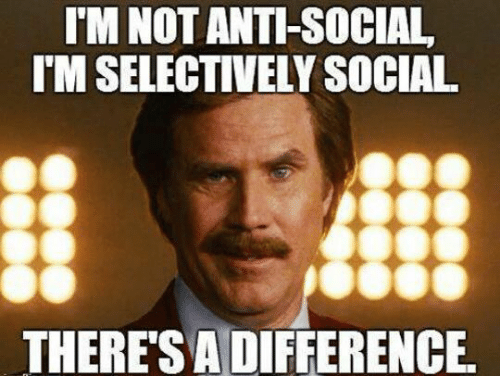

<br>What social platforms do the experts prefer to discuss, learn and share their work?
<br>Peek into the steaming cauldron of graphs with me, and you shall get the answer.

In [ ]:
soc_df = survey20[['Q15', 'Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10', 'Q39_Part_11', 'Q39_OTHER']]

nlp_dict = {'Q39_Part_1': 'Twitter',
            'Q39_Part_2': 'Email newsletters',
            'Q39_Part_3': 'Reddit ',
            'Q39_Part_4': 'Kaggle',
            'Q39_Part_5': 'Course Forums',
            'Q39_Part_6': 'YouTube',
            'Q39_Part_7': 'Podcasts',
            'Q39_Part_8': 'Blogs',
            'Q39_Part_9': 'Journal Publications',
            'Q39_Part_10': 'Slack Communities',
            'Q39_Part_11': 'None',
            'Q39_OTHER': 'Other'}

def set_soc_flags(in_df, col_name):
    in_df[nlp_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

soc_df = set_soc_flags(soc_df, 'Q39_Part_1')
soc_df = set_soc_flags(soc_df, 'Q39_Part_2')
soc_df = set_soc_flags(soc_df, 'Q39_Part_3')
soc_df = set_soc_flags(soc_df, 'Q39_Part_4')
soc_df = set_soc_flags(soc_df, 'Q39_Part_5')
soc_df = set_soc_flags(soc_df, 'Q39_Part_6')
soc_df = set_soc_flags(soc_df, 'Q39_Part_7')
soc_df = set_soc_flags(soc_df, 'Q39_Part_8')
soc_df = set_soc_flags(soc_df, 'Q39_Part_9')
soc_df = set_soc_flags(soc_df, 'Q39_Part_10')
soc_df = set_soc_flags(soc_df, 'Q39_Part_11')
soc_df = set_soc_flags(soc_df, 'Q39_OTHER')

soc_df = soc_df.melt(id_vars = ["Q15"], var_name = "Social Platforms", value_name = "Presence")
soc_df = soc_df[soc_df.Presence == True]
del soc_df['Presence']

soc_df = soc_df[(soc_df.Q15 == '5-10 years') | (soc_df.Q15 == '10-20 years') | (soc_df.Q15 == '20+ years')]

fig = px.density_heatmap(soc_df, x="Social Platforms", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

<span style="color:teal;">Blogs like Towards Data Science, Analytics Vidhya and others is where the experts go to read up on what's new.
<br><b>Kaggle</b> also figures highly on the preferred source of interesting reads in the field of DS.</span>
<br>Since many expert Kagglers are working in research, they like to read journal publications to stay up-to-date. The other platforms that catch their interest include YouTube, Twitter and those Email newsletters that many of us might not take seriously. Next time, do scour through what they have to offer.

<br>Where do the masters go to sharpen those knives?
<br>A plot shall answer.

In [ ]:
course_df = survey20[['Q15', 'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER']]

course_dict = {'Q37_Part_1': 'Coursera',
            'Q37_Part_2': 'edX',
            'Q37_Part_3': 'Kaggle Learn Courses',
            'Q37_Part_4': 'DataCamp',
            'Q37_Part_5': 'Fast.ai',
            'Q37_Part_6': 'Udacity',
            'Q37_Part_7': 'Udemy',
            'Q37_Part_8': 'LinkedIn Learning',
            'Q37_Part_9': 'Cloud-certification programs',
            'Q37_Part_10': 'University Courses',
            'Q37_Part_11': 'None',
            'Q37_OTHER': 'Other'}

def set_course_flags(in_df, col_name):
    in_df[course_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

course_df = set_course_flags(course_df, 'Q37_Part_1')
course_df = set_course_flags(course_df, 'Q37_Part_2')
course_df = set_course_flags(course_df, 'Q37_Part_3')
course_df = set_course_flags(course_df, 'Q37_Part_4')
course_df = set_course_flags(course_df, 'Q37_Part_5')
course_df = set_course_flags(course_df, 'Q37_Part_6')
course_df = set_course_flags(course_df, 'Q37_Part_7')
course_df = set_course_flags(course_df, 'Q37_Part_8')
course_df = set_course_flags(course_df, 'Q37_Part_9')
course_df = set_course_flags(course_df, 'Q37_Part_10')
course_df = set_course_flags(course_df, 'Q37_Part_11')
course_df = set_course_flags(course_df, 'Q37_OTHER')

course_df = course_df.melt(id_vars = ["Q15"], var_name = "Social Platforms", value_name = "Presence")
course_df = course_df[course_df.Presence == True]
del course_df['Presence']

course_df = course_df[(course_df.Q15 == '5-10 years') | (course_df.Q15 == '10-20 years') | (course_df.Q15 == '20+ years')]

fig = px.density_heatmap(course_df, x="Social Platforms", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

<span style="color:teal;">Coursera is the best destination to learn the tricks of the trade</span> as shared by the expert Kagglers.
<br>While university-offered courses are also a good place to sharpen those knives, <span style="color:teal;"><b>Kaggle Learn Courses</b> also have a lot to offer.</span>
<br>Other popular data-science courses can be found at edX, Udemy and Udacity.
<br><i>Get your game on!</i>

In [ ]:
public_df = survey20[['Q15', 'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 'Q36_Part_8', 'Q36_Part_9', 'Q36_OTHER']]

course_dict = {'Q36_Part_1': 'Plotly Dash',
            'Q36_Part_2': 'Streamlit',
            'Q36_Part_3': 'NBViewer',
            'Q36_Part_4': 'GitHub',
            'Q36_Part_5': 'Personal blog',
            'Q36_Part_6': 'Kaggle',
            'Q36_Part_7': 'Colab',
            'Q36_Part_8': 'Shiny',
            'Q36_Part_9': 'None',
            'Q36_OTHER': 'Other'}

def set_public_flags(in_df, col_name):
    in_df[course_dict[col_name]] = ~in_df[col_name].isnull()
    del in_df[col_name]
    return in_df

public_df = set_public_flags(public_df, 'Q36_Part_1')
public_df = set_public_flags(public_df, 'Q36_Part_2')
public_df = set_public_flags(public_df, 'Q36_Part_3')
public_df = set_public_flags(public_df, 'Q36_Part_4')
public_df = set_public_flags(public_df, 'Q36_Part_5')
public_df = set_public_flags(public_df, 'Q36_Part_6')
public_df = set_public_flags(public_df, 'Q36_Part_7')
public_df = set_public_flags(public_df, 'Q36_Part_8')
public_df = set_public_flags(public_df, 'Q36_Part_9')
public_df = set_public_flags(public_df, 'Q36_OTHER')

public_df = public_df.melt(id_vars = ["Q15"], var_name = "Public Sharing", value_name = "Presence")
public_df = public_df[public_df.Presence == True]
del public_df['Presence']

public_df = public_df[(public_df.Q15 == '5-10 years') | (public_df.Q15 == '10-20 years') | (public_df.Q15 == '20+ years')]

fig = px.density_heatmap(public_df, x="Public Sharing", y="Q15", nbinsx=20, nbinsy=20, labels={"Q15": "(DS & ML) Experience"}, color_continuous_scale="YlGnBu")
fig.show()

<span style="color:teal;">GitHub is the place to go when you seek a solution from the masters</span>
<br>The expert Kagglers also like to share their works on <b>Kaggle</b> and many of them have personal blogs.
<br>Google Colab also seems to be popular among the Silver Kagglers.

<br>A large number of experts have also kept their work private probably due to confidentiality demanded by their employers.

***

This is it dear reader.
<br>Your time and patience spent on reading this notebook is greatly appreciated. I hope you could learn something about the habits of (DS & ML)-Expert Kagglers and found things that can enrich your skillset.

![](https://64.media.tumblr.com/75b3f2426ecbc015506053d7e08d7dda/tumblr_pfbnb4O4iV1vd8jsjo2_500.gifv)